# Introduction

Entertainment industry and movies in particular are a fascinating topic and wanted to look into a movies dataset for a deep dive.

Questions for the project:
1. Do certain movie genres get better reviews?
2. Any correlation between length of movies and reviews? Does a certain length get better reviews?
3. Is the language of the movies reflecting the reality of the world?

For future analysis:
* Which director has the most movies? Which director has the best reviews? (directors with 10 movies or more)
* Is there a correlation between number of movies of a director and average votes?

Plots to consider:
1. standard plots - number of movies per genre 
2. boxplot - distribution of average votes per movie genre
3. scatter plot of movie duration and average votes
4. barplot of movie durations
5. historical distribution of movies (per buckets of years, since 1900 to 2020)
6. Average votes from 1 to 10 split per genre to see where are the most highly reviewed genres
7. scatter plot top 10 movie languages versus languages in reality

Importing the necessary libraries and the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
movies=pd.read_csv('../data/IMDb movies.csv')

Cleaning the unnecessary columns

In [3]:
movies.drop(columns=['budget','usa_gross_income','worlwide_gross_income','metascore','reviews_from_users','reviews_from_critics','date_published','original_title','description'], inplace=True)
movies

,imdb_title_id,title,year,genre,duration,country,language,director,writer,production_company,actors,avg_vote,votes
0,tt0000574,The Story of the Kelly Gang,1906,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",6.1,537
1,tt0001892,Den sorte drøm,1911,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",5.9,171
2,tt0002101,Cleopatra,1912,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",5.2,420
3,tt0002130,L'Inferno,1911,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",7.0,2019
4,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...",1912,"Biography, Drama",60,USA,English,Sidney Olcott,Gene Gauntier,Kalem Company,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...",5.7,438
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81268,tt9903716,Jessie,2019,"Horror, Thriller",106,India,Telugu,Aswani Kumar V.,Aswani Kumar V.,Ekaa Art Production,"Sritha Chandana, Pavani Gangireddy, Abhinav Go...",7.2,219
81269,tt9905412,Ottam,2019,Drama,120,India,Malayalam,Zam,Rajesh k Narayan,Thomas Thiruvalla Films,"Nandu Anand, Roshan Ullas, Manikandan R. Achar...",7.8,510
81270,tt9905462,Pengalila,2019,Drama,111,India,Malayalam,T.V. Chandran,T.V. Chandran,Benzy Productions,"Lal, Akshara Kishor, Iniya, Narain, Renji Pani...",8.4,604
81271,tt9911774,Padmavyuhathile Abhimanyu,2019,Drama,130,India,Malayalam,Vineesh Aaradya,"Vineesh Aaradya, Vineesh Aaradya",RMCC Productions,"Anoop Chandran, Indrans, Sona Nair, Simon Brit...",8.4,369


Checking the columns with na values and cleaning them

In [4]:
movies.columns[movies.isna().any()].tolist()

['country', 'language', 'director', 'writer', 'production_company', 'actors']

In [5]:
movies.isnull().sum()

imdb_title_id            0
title                    0
year                     0
genre                    0
duration                 0
country                 39
language               755
director                73
writer                1493
production_company    4325
actors                  66
avg_vote                 0
votes                    0
dtype: int64

In [6]:
movies.dropna(subset=['writer', 'production_company','director','actors','country','language'],inplace=True) #dropping all columns rows with no values

Checking if there are any remaining na values

In [7]:
movies.isnull().any(axis = 1).sum()

0

Prepare the data for the Language analysis
We take only the 1st language in the list, where there are multiple languages listed

In [8]:
movies['Main_language'] = movies['language'].str.split().str[0]
movies['Main_language'] = movies['Main_language'].replace({',': ''}, regex=True)

checking the number of movies per language

In [9]:
languages=movies.groupby(['Main_language'], axis=0).count().sort_values(by=['title'],ascending=False)
languages 

,imdb_title_id,title,year,genre,duration,country,language,director,writer,production_company,actors,avg_vote,votes
Main_language,,,,,,,,,,,,,
English,39333,39333,39333,39333,39333,39333,39333,39333,39333,39333,39333,39333,39333
French,5109,5109,5109,5109,5109,5109,5109,5109,5109,5109,5109,5109,5109
Spanish,3037,3037,3037,3037,3037,3037,3037,3037,3037,3037,3037,3037,3037
Italian,2994,2994,2994,2994,2994,2994,2994,2994,2994,2994,2994,2994,2994
Japanese,2714,2714,2714,2714,2714,2714,2714,2714,2714,2714,2714,2714,2714
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cree,1,1,1,1,1,1,1,1,1,1,1,1,1
Samoan,1,1,1,1,1,1,1,1,1,1,1,1,1
Sanskrit,1,1,1,1,1,1,1,1,1,1,1,1,1


In [10]:
#This part is set aside for a future analysis
#checking the number of movies per director
#directors=movies.groupby(['director'], axis=0).count().sort_values(by=['title'],ascending=False)
#directors 

In [11]:
#indexNames = df2[df2['title'] <10].index
#df2.drop(indexNames , inplace=True)
#df2 #keep only directors with 10 or more movies

In [12]:
#directors.drop(columns=['title','year','genre','duration','country','language','writer','production_company','actors','avg_vote','votes'], inplace=True)
#directors.head()

In [13]:
#movies = movies.merge(directors, on='director') #add an extra column showing the number of movies of each director
#movies.rename(columns = {'imdb_title_id_y': 'Total movies of director'}, inplace = True)
#movies

# Visualizing with a scatter plot the relation between top 10 languages in movies compared to languages spoken worldwide

In [14]:
lang = movies[['avg_vote', 'Main_language','title']].copy()
Langsum=lang.groupby(['Main_language']).count().reset_index()
top10l=Langsum.nlargest(10, 'title')
top10l['Percentage_all_movies']=(top10l['title']/75171)*100
top10l['Spoken']=[1132,280,534,63,126,175,615,258,78,80]
top10l['Percentage_spoken']=(top10l['Spoken']/7800)*100
top10l

,Main_language,avg_vote,title,Percentage_all_movies,Spoken,Percentage_spoken
34,English,39333,39333,52.324700,1132,14.512821
41,French,5109,5109,6.796504,280,3.589744
125,Spanish,3037,3037,4.040122,534,6.846154
62,Italian,2994,2994,3.982919,63,0.807692
63,Japanese,2714,2714,3.610435,126,1.615385
45,German,2252,2252,2.995836,175,2.243590
55,Hindi,2139,2139,2.845512,615,7.884615
109,Russian,1357,1357,1.805217,258,3.307692
140,Turkish,1113,1113,1.480624,78,1.000000
22,Cantonese,1031,1031,1.371540,80,1.025641


Text(0.5, 1.0, 'Top 10 main languages in movies compared to languages spoken worldwide')

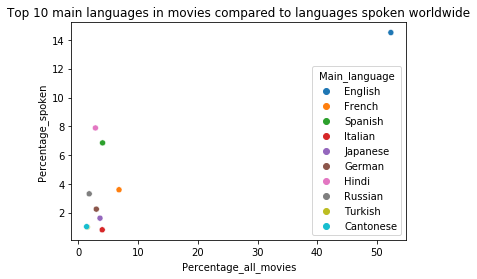

In [15]:
sns.scatterplot(data=top10l, x="Percentage_all_movies", y="Percentage_spoken", hue='Main_language').set_title('Top 10 main languages in movies compared to languages spoken worldwide')

interesting to note that Mandarin Chinese (2nd most spoken language with 1117 mil, Standard Arabic with 274 mil, Bengali with 265 mil, Portuguese with 234 mil, Indonesian with 199 mil are not even appearing in the top 10 list of movie languages)

# Visualizing with relplot correlation between movie duration and average votes

In [16]:
duration = movies[['avg_vote', 'duration','title']].copy()

Text(10.049999999999997, 0.5, 'Average votes')

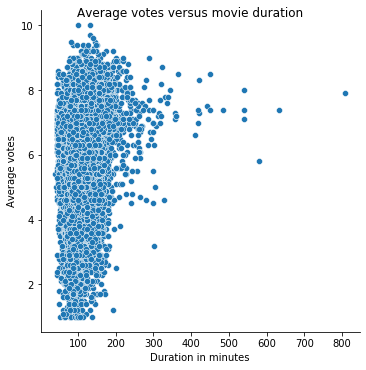

In [17]:
g=sns.relplot(data=duration,x="duration", y="avg_vote", sizes=(10, 200))
g.fig.suptitle('Average votes versus movie duration')
plt.xlabel("Duration in minutes")
plt.ylabel("Average votes")

there does not seem to be any correlation between duration of a movie and the average vote

Creating bins to represent duration of movies based on length

In [18]:
bins=[0,90,120,200,1000]
labels = ['short','standard','long','this should be a series']
duration['Duration'] = pd.cut(duration['duration'], bins=bins, labels=labels)
duration

,avg_vote,duration,title,Duration
2,5.2,100,Cleopatra,standard
3,7.0,68,L'Inferno,short
4,5.7,60,"From the Manger to the Cross; or, Jesus of Naz...",short
5,6.8,85,Madame DuBarry,short
6,6.2,120,Quo Vadis?,standard
...,...,...,...,...
81268,7.2,106,Jessie,standard
81269,7.8,120,Ottam,standard
81270,8.4,111,Pengalila,standard
81271,8.4,130,Padmavyuhathile Abhimanyu,long


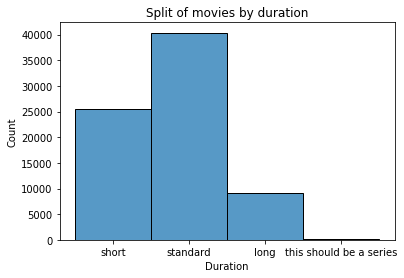

In [19]:
sns.histplot(data=duration, x="Duration", kde=False).set_title('Split of movies by duration')
plt.show()

# Using a histogram to show evolution of number of movies over time

We use a histogram to show the distribution over the years for number of movies.
We can see a gradual increase in the number, with higher increase in the last 20 years.

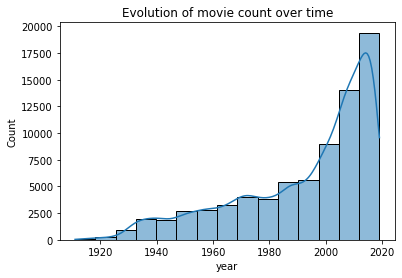

In [20]:
sns.histplot(data=movies, x="year", bins=15, kde=True).set_title('Evolution of movie count over time')
plt.show()

# Using a bar graph to show the split of movies by main movie genres

First we get the data from the "genre" column, which is showing multiple genres. We split the data and only get the first of all the 3 genres mentioned


In [21]:
split_data = movies["genre"].str.split(",")
data = split_data.to_list()
names = ["Main_genre", "rest", 'other']
new_df = pd.DataFrame(data, columns=names)
main = new_df["Main_genre"]
movies = pd.concat([movies,main], axis = 1)

eliminating 2 outliers that only have 1 movie each

In [22]:
movies.drop(movies[movies['Main_genre'] == "Adult"].index, inplace=True)
movies.drop(movies[movies['Main_genre'] == "Documentary"].index, inplace=True)

In [23]:
#movies[movies.index.duplicated()]

Next step is to group the information by Main genre and only keep the top 10, since the rest only have small numbers and would be irrelevant in the graph

In [24]:
genre=movies.groupby(['Main_genre']).count().reset_index()
genre.drop(genre.columns.difference(['Main_genre','title']), 1, inplace=True)
sorted_genre= genre.sort_values('title', ascending=False)
top10=sorted_genre.nlargest(10, 'title')
top10

,Main_genre,title
6,Drama,20345
4,Comedy,19894
0,Action,9832
5,Crime,4649
11,Horror,4124
1,Adventure,3011
3,Biography,1788
2,Animation,1695
18,Thriller,1075
20,Western,595


In [25]:
df3=movies.groupby(['Main_genre'], axis=0).mean().sort_values(by=['avg_vote'],ascending=False).reset_index()
df3.drop(df3.columns.difference(['Main_genre','avg_vote']), 1, inplace=True)
votes = df3["avg_vote"]
combined= pd.concat([top10,votes], axis = 1)
combined.dropna(subset=['Main_genre', 'title'], inplace=True)
combined_sorted= combined.sort_values('title', ascending=False)
combined_sorted

,Main_genre,title,avg_vote
6,Drama,20345.0,6.047257
4,Comedy,19894.0,6.114894
0,Action,9832.0,6.276134
5,Crime,4649.0,6.078147
11,Horror,4124.0,5.934439
1,Adventure,3011.0,6.257244
3,Biography,1788.0,6.156098
2,Animation,1695.0,6.160606
18,Thriller,1075.0,5.836923
20,Western,595.0,5.520000


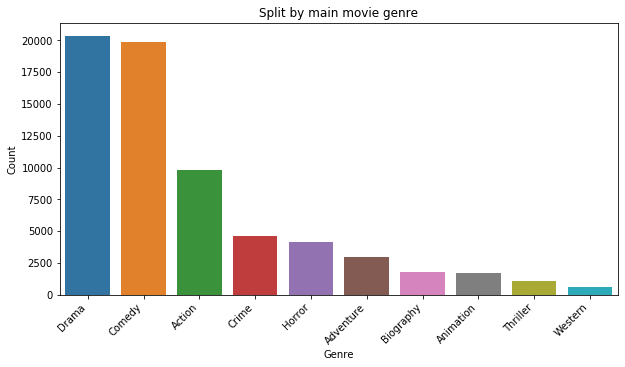

In [26]:
plt.figure(figsize=(10,5))
fig = sns.barplot(x = 'Main_genre', y = 'title', data = top10)
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Split by main movie genre")
plt.xticks(rotation=45, horizontalalignment='right')
plt.show(fig)

Creating a scatter plot to visualize the distribution of top 10 genres to number of movies

Text(0.5, 1.0, 'Top 10 genres average votes to number of movies')

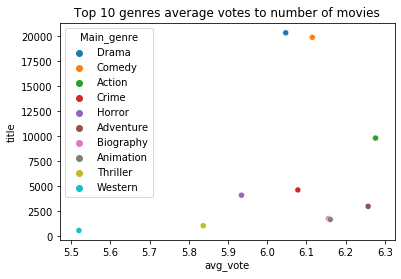

In [27]:
sns.scatterplot(data=combined_sorted, x="avg_vote", y="title", hue="Main_genre").set_title('Top 10 genres average votes to number of movies')

# Visualizing the distribution of average votes per genre of movie

In [28]:
genre_votes = movies[['avg_vote', 'Main_genre','title']].copy()

Text(0.5, 0.98, 'Average votes versus movie duration')

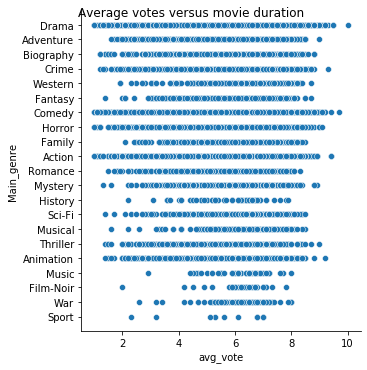

In [29]:
fig=sns.relplot(data=genre_votes,x="avg_vote", y="Main_genre", sizes=(10, 200))
fig.fig.suptitle('Average votes versus movie duration')

The scatter plot does not really give a nice visualization of the situation, so next step is to use a boxplot.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

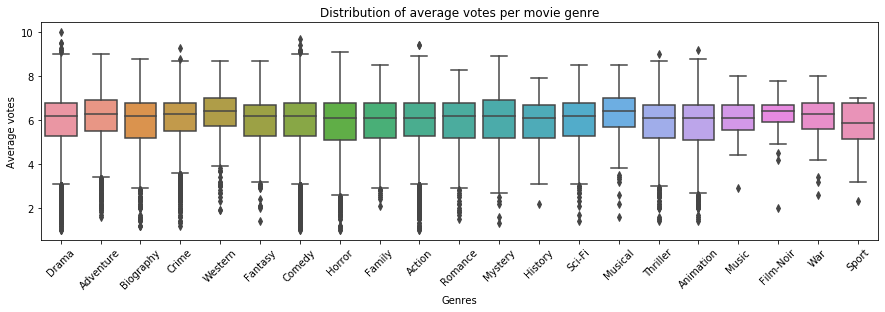

In [30]:
plt.figure(figsize=(15,4))
ax = sns.boxplot(x="Main_genre", y="avg_vote", data=genre_votes).set(title='Distribution of average votes per movie genre', xlabel='Genres', ylabel='Average votes')
plt.xticks(rotation=45)

The boxplot is more elegant and shows a clear view of the distribution

In [31]:
movies.dropna().describe()

,year,duration,avg_vote,votes
count,69888.000000,69888.000000,69888.000000,6.988800e+04
mean,1990.658811,99.810683,5.945317,1.065752e+04
std,23.974520,21.867636,1.215306,5.602943e+04
min,1911.000000,40.000000,1.000000,1.000000e+02
25%,1975.000000,88.000000,5.300000,2.170000e+02
50%,1999.000000,96.000000,6.200000,5.450000e+02
75%,2010.000000,107.000000,6.800000,2.190000e+03
max,2019.000000,632.000000,10.000000,2.159628e+06


This just gives a summary of the numeric columns

In [32]:
#If we want to export the new dataset
#movies.to_csv('new_data.csv')

# Conclusion

The ideas drawn from the analysis

1. Do certain movie genres get better reviews? There is a slight difference in the averages for some of the genres, but there does not seem to be a clear cut and well defined difference
2. Does a certain length get better reviews? Does not seem to be the case.
3. Is the language of the movies reflecting the reality of the world? Not really. The movies language is largely skewed to the English language, 5 out of top 10 most spread languages spoken worldwide miss entirely from being represented in the top 10 movie languages
